In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
# specify encoding to deal with different formats
df = pd.read_csv('transaction_data.csv', encoding = 'ISO-8859-1')

In [4]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.730,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.520,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.900,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.730,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.400,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083818 entries, 0 to 1083817
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1083818 non-null  int64  
 1   TransactionId           1083818 non-null  int64  
 2   TransactionTime         1083818 non-null  object 
 3   ItemCode                1083818 non-null  int64  
 4   ItemDescription         1080910 non-null  object 
 5   NumberOfItemsPurchased  1083818 non-null  int64  
 6   CostPerItem             1083818 non-null  float64
 7   Country                 1083818 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 66.2+ MB


In [6]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

ItemDescription           2908
Country                      0
CostPerItem                  0
NumberOfItemsPurchased       0
ItemCode                     0
TransactionTime              0
TransactionId                0
UserId                       0
dtype: int64

In [7]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
322,-1,6314803,Mon Jan 14 11:15:00 IST 2019,495159,NaN,9,0.000,United Kingdom
762,-1,6206420,Mon Nov 05 05:34:00 IST 2018,434364,NaN,3,0.000,United Kingdom
1080,-1,6297863,Sat Jan 05 12:06:00 IST 2019,1782417,NaN,-3,0.000,United Kingdom
2204,-1,6142961,Mon Sep 10 09:41:00 IST 2018,458157,NaN,-240,0.000,United Kingdom
2210,-1,6176445,Mon Oct 08 10:06:00 IST 2018,1666056,NaN,108,0.000,United Kingdom


In [8]:
# remove duplicates
df.drop_duplicates(inplace = True)

In [9]:
df['TransactionTime'] = df['TransactionTime'].str.replace('IST', '')

# change the invoice_date format - String to Timestamp format
df['TransactionTime'] = pd.to_datetime(df.TransactionTime, format='%a %b %d %H:%M:%S %Y')

In [10]:
# change description - UPPER case to LOWER case
df['ItemDescription'] = df.ItemDescription.str.lower()

In [11]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,2019-02-02 12:50:00,465549,family album white picture frame,6,11.730,United Kingdom
1,337701,6283376,2018-12-26 09:06:00,482370,london bus coffee mug,3,3.520,United Kingdom
2,267099,6385599,2019-02-15 09:45:00,490728,set 12 colour pencils dolly girl,72,0.900,France
3,380478,6044973,2018-06-22 07:14:00,459186,union jack flag luggage tag,3,1.730,United Kingdom
4,-1,6143225,2018-09-10 11:58:00,1733592,washroom metal sign,3,3.400,United Kingdom


In [12]:
#Removing rows with missing values
# df_new without missing values
df_new = df.dropna()

In [13]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

Country                   0
CostPerItem               0
NumberOfItemsPurchased    0
ItemDescription           0
ItemCode                  0
TransactionTime           0
TransactionId             0
UserId                    0
dtype: int64

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535118 entries, 0 to 1081501
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   UserId                  535118 non-null  int64         
 1   TransactionId           535118 non-null  int64         
 2   TransactionTime         535118 non-null  datetime64[ns]
 3   ItemCode                535118 non-null  int64         
 4   ItemDescription         535118 non-null  object        
 5   NumberOfItemsPurchased  535118 non-null  int64         
 6   CostPerItem             535118 non-null  float64       
 7   Country                 535118 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 36.7+ MB


In [15]:
df_new.describe().round(2)

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,535118.000,535118.000,535118.000,535118.000,535118.000
mean,240816.020,6159311.720,657636.410,29.020,9.590
std,142333.530,147531.800,452082.370,657.220,2322.740
min,-1.000,5900015.000,-1.000,-242985.000,-15265.640
25%,259329.000,6026856.000,460929.000,3.000,1.730
50%,301560.000,6166490.000,475293.000,9.000,2.880
75%,341082.000,6288975.000,488901.000,30.000,5.700
max,384027.000,6397457.000,1894494.000,242985.000,1696285.440


In [16]:
#Removing Number of Item Code, Items Purchased and Cost Per Item with negative values
df_new = df_new[df_new.NumberOfItemsPurchased >= 0]
df_new = df_new[df_new.CostPerItem >= 0]
df_new = df_new[df_new.ItemCode >= 0]

In [17]:
df_new.describe()

,UserId,TransactionId,ItemCode,NumberOfItemsPurchased,CostPerItem
count,523190.000,523190.000,523190.000,523190.000,523190.000
mean,240211.492,6159536.173,660984.548,32.118,7.780
std,142888.049,147639.931,450743.377,473.118,2345.144
min,-1.000,5900015.000,42.000,3.000,0.000
25%,-1.000,6026933.000,461496.000,3.000,1.730
50%,301707.000,6167150.000,475356.000,12.000,2.880
75%,341355.000,6289767.000,488964.000,36.000,5.700
max,384027.000,6397457.000,1894494.000,242985.000,1696285.440


In [18]:
#Add the column amount_spent
df_new['AmountSpent'] = df_new['NumberOfItemsPurchased'] * df_new['CostPerItem']

In [19]:
# rearrange all the columns for easy reference
df_new = df_new[['TransactionId','TransactionTime','ItemCode','ItemDescription','NumberOfItemsPurchased','CostPerItem','AmountSpent','UserId','Country']]

In [20]:
# Add the columns - Month, Day and Hour for the Transaction Time

df_new.insert(loc=2, column='Year_Month', value=df_new['TransactionTime'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='Month', value=df_new.TransactionTime.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='Day', value=(df_new.TransactionTime.dt.dayofweek)+1)
df_new.insert(loc=5, column='Hour', value=df_new.TransactionTime.dt.hour)

In [21]:
df_new.head()

,TransactionId,TransactionTime,Year_Month,Month,Day,Hour,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,UserId,Country
0,6355745,2019-02-02 12:50:00,201902,2,6,12,465549,family album white picture frame,6,11.730,70.380,278166,United Kingdom
1,6283376,2018-12-26 09:06:00,201812,12,3,9,482370,london bus coffee mug,3,3.520,10.560,337701,United Kingdom
2,6385599,2019-02-15 09:45:00,201902,2,5,9,490728,set 12 colour pencils dolly girl,72,0.900,64.800,267099,France
3,6044973,2018-06-22 07:14:00,201806,6,5,7,459186,union jack flag luggage tag,3,1.730,5.190,380478,United Kingdom
4,6143225,2018-09-10 11:58:00,201809,9,1,11,1733592,washroom metal sign,3,3.400,10.200,-1,United Kingdom


In [22]:
# How many orders made by the customers?

df_new.groupby(by=['UserId','Country'], as_index=False)['TransactionId'].count().head()

,UserId,Country,TransactionId
0,-1,Bahrain,1
1,-1,EIRE,652
2,-1,France,66
3,-1,Hong Kong,275
4,-1,Israel,47


In [23]:
rows = df_new.apply(lambda df_new: True if df_new['UserId'] == -1 else False , axis=1)
count = len(rows[rows == True].index)

print('Number of Rows in User Id that have value -1 : ', count)

Number of Rows in User Id that have value -1 :  131908


In [24]:
df_new = df_new[df_new['UserId'] != -1]

In [25]:
rows = df_new.apply(lambda df_new: True if df_new['UserId'] == -1 else False , axis=1)
count = len(rows[rows == True].index)

print('Number of Rows in User Id that have value -1 : ', count)

Number of Rows in User Id that have value -1 :  0


In [26]:
# How many orders made by the customers?

df_new.groupby(by=['UserId','Country'], as_index=False)['TransactionId'].count().head()

,UserId,Country,TransactionId
0,259266,United Kingdom,1
1,259287,Iceland,182
2,259308,Finland,27
3,259329,Italy,72
4,259350,Norway,16


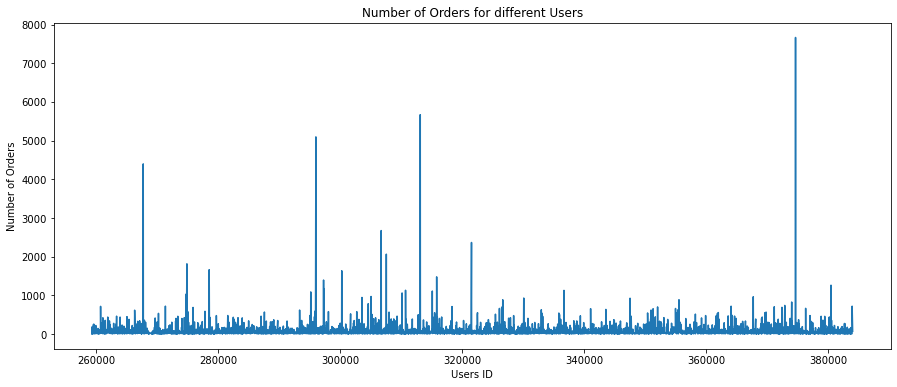

In [27]:
orders = df_new.groupby(by=['UserId','Country'], as_index=False)['TransactionId'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.UserId, orders.TransactionId)
plt.xlabel('Users ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Users')
plt.show()

In [28]:
# Top 5
print('The TOP 5 Users with most number of orders...')
orders.sort_values(by='TransactionId', ascending=False).head()

The TOP 5 Users with most number of orders...


,UserId,Country,TransactionId
4016,374661,United Kingdom,7665
1888,313131,EIRE,5670
1298,296016,United Kingdom,5095
334,267708,United Kingdom,4397
1670,306726,United Kingdom,2674


In [29]:
df_new.head()

,TransactionId,TransactionTime,Year_Month,Month,Day,Hour,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,UserId,Country
0,6355745,2019-02-02 12:50:00,201902,2,6,12,465549,family album white picture frame,6,11.730,70.380,278166,United Kingdom
1,6283376,2018-12-26 09:06:00,201812,12,3,9,482370,london bus coffee mug,3,3.520,10.560,337701,United Kingdom
2,6385599,2019-02-15 09:45:00,201902,2,5,9,490728,set 12 colour pencils dolly girl,72,0.900,64.800,267099,France
3,6044973,2018-06-22 07:14:00,201806,6,5,7,459186,union jack flag luggage tag,3,1.730,5.190,380478,United Kingdom
5,6307136,2019-01-11 09:50:00,201901,1,5,9,1787247,cut glass t-light holder octagon,12,3.520,42.240,285957,United Kingdom


In [30]:
MoneySpent = df_new.groupby(by=['UserId','Country'], as_index=False)['AmountSpent'].sum()

In [31]:
MoneySpent.head()

,UserId,Country,AmountSpent
0,259266,United Kingdom,320608.800
1,259287,Iceland,17879.700
2,259308,Finland,5991.120
3,259329,Italy,6043.920
4,259350,Norway,1221.600


In [32]:
# Top 5 highest money spent

print('The TOP 5 customers with highest money spent...')
MoneySpent.sort_values(by='AmountSpent', ascending=False).head()

The TOP 5 customers with highest money spent...


,UserId,Country,AmountSpent
1046,288687,United Kingdom,40710850.560
1698,307566,Netherlands,1158793.950
4206,380142,United Kingdom,1076194.080
3734,366450,United Kingdom,805910.520
3015,345366,United Kingdom,699808.830


In [33]:
df_new.sort_values(by='Year_Month')

# There are some data where the year is 2028!???
# the data set was supposed to be between feb2018-feb2019

,TransactionId,TransactionTime,Year_Month,Month,Day,Hour,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,AmountSpent,UserId,Country
135409,5924974,2018-02-24 09:28:00,201802,2,6,9,458199,glitter christmas star,18,1.180,21.240,295785,United Kingdom
774678,5931321,2018-02-27 08:15:00,201802,2,2,8,1784811,60 teatime fairy cake cases,72,0.760,54.720,351603,United Kingdom
423166,5901775,2018-02-12 08:54:00,201802,2,1,8,360444,ass col small sand gecko p'weight,6,0.580,3.480,295638,United Kingdom
423171,5904272,2018-02-13 10:06:00,201802,2,2,10,1732206,wood s/3 cabinet ant white finish,12,9.600,115.200,374850,United Kingdom
34992,5921883,2018-02-21 11:31:00,201802,2,3,11,998739,tea time oven glove,300,1.470,441.000,289758,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795292,5913677,2028-02-18 09:18:00,202802,2,5,9,475839,lunch box i love london,6,2.700,16.200,335265,United Kingdom
762212,5913853,2028-02-18 10:31:00,202802,2,5,10,477435,ribbon reel socks and mittens,15,2.280,34.200,333018,United Kingdom
622412,5912093,2028-02-18 06:08:00,202802,2,5,6,468321,coffee mug cat + bird design,54,3.520,190.080,266301,France
878512,5913578,2028-02-18 08:37:00,202802,2,5,8,471828,babushka lights string of 10,12,9.320,111.840,296835,United Kingdom


In [34]:
rows = df_new.apply(lambda df_new: True if df_new['Year_Month'] > 201902 else False , axis=1)
count = len(rows[rows == True].index)

print('Number of Rows that have date exceeding feb 2019 : ', count)

Number of Rows that have date exceeding feb 2019 :  1091


In [35]:
df_new = df_new[df_new['Year_Month'] < 201902]

In [36]:
rows = df_new.apply(lambda df_new: True if df_new['Year_Month'] > 201902 else False , axis=1)
count = len(rows[rows == True].index)

print('Number of Rows that have date exceeding feb 2019 : ', count)

Number of Rows that have date exceeding feb 2019 :  0


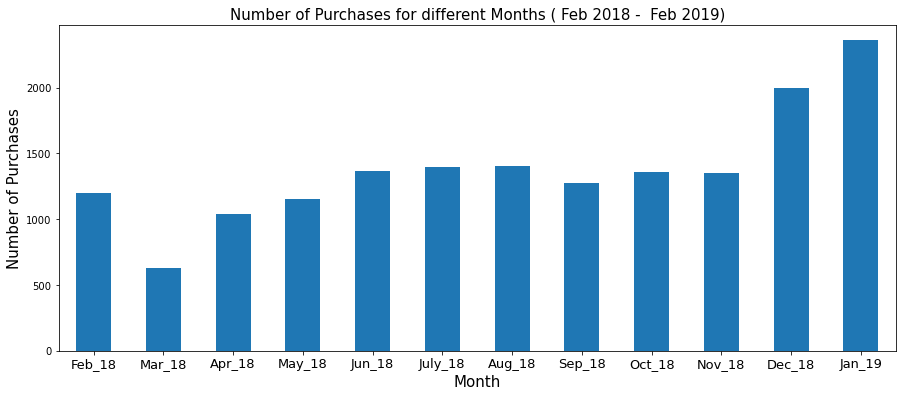

In [37]:
ax = df_new.groupby('TransactionId')['Year_Month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Purchases',fontsize=15)
ax.set_title('Number of Purchases for different Months ( Feb 2018 -  Feb 2019)',fontsize=15)
ax.set_xticklabels(('Feb_18','Mar_18','Apr_18','May_18','Jun_18','July_18','Aug_18','Sep_18','Oct_18','Nov_18','Dec_18','Jan_19','Feb_19'), rotation='horizontal', fontsize=13)
plt.show()

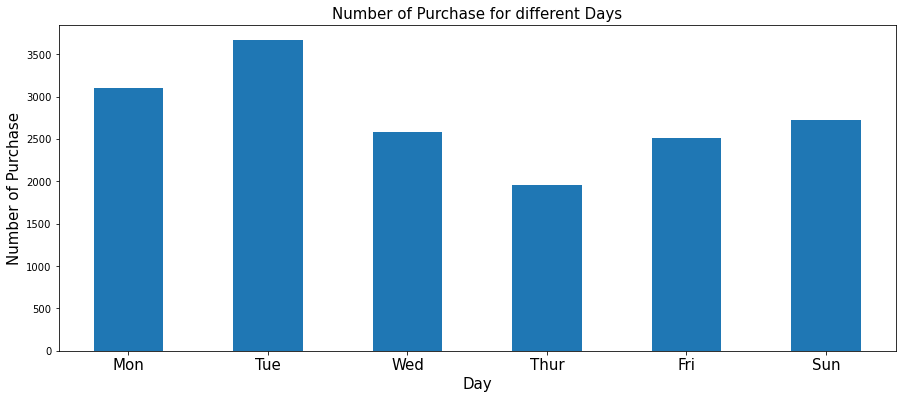

In [38]:
ax = df_new.groupby('TransactionId')['Day'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Purchase',fontsize=15)
ax.set_title('Number of Purchase for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

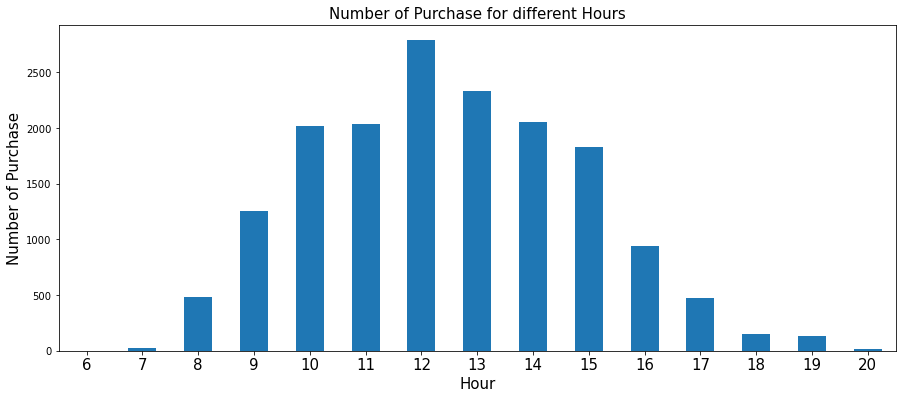

In [39]:
ax = df_new.groupby('TransactionId')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Purchase',fontsize=15)
ax.set_title('Number of Purchase for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

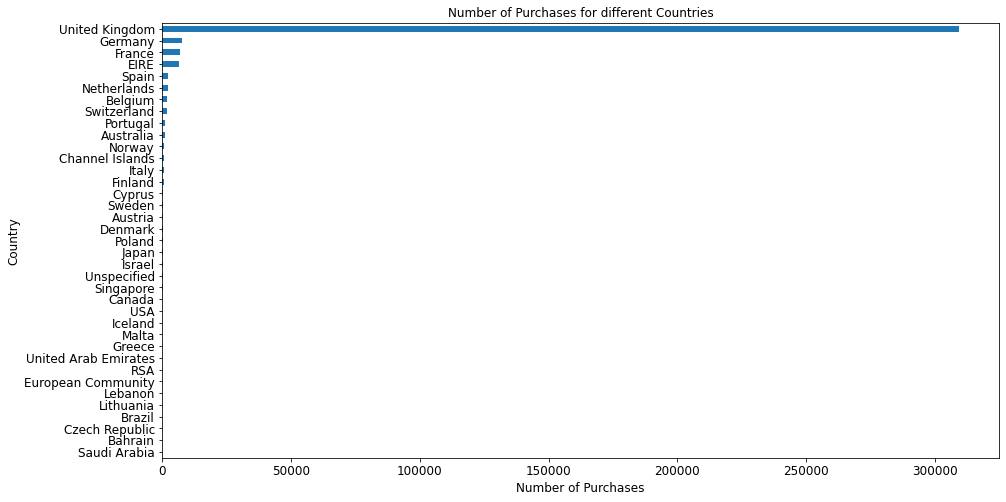

In [40]:
# purchase for different countries

group_country_orders = df_new.groupby('Country')['TransactionId'].count().sort_values()
# del group_country_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Purchases for different Countries', fontsize=12)
plt.show()

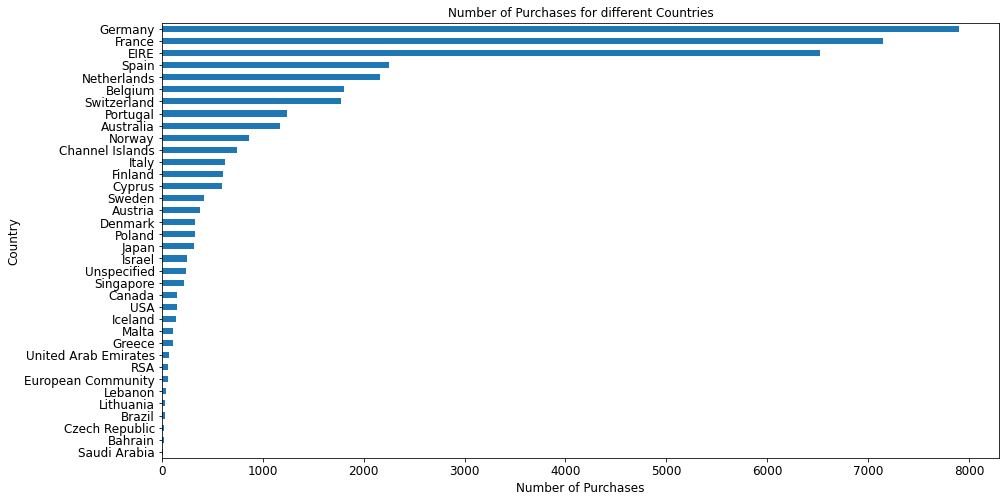

In [41]:
group_country_orders = df_new.groupby('Country')['TransactionId'].count().sort_values()
del group_country_orders['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Purchases for different Countries', fontsize=12)
plt.show()

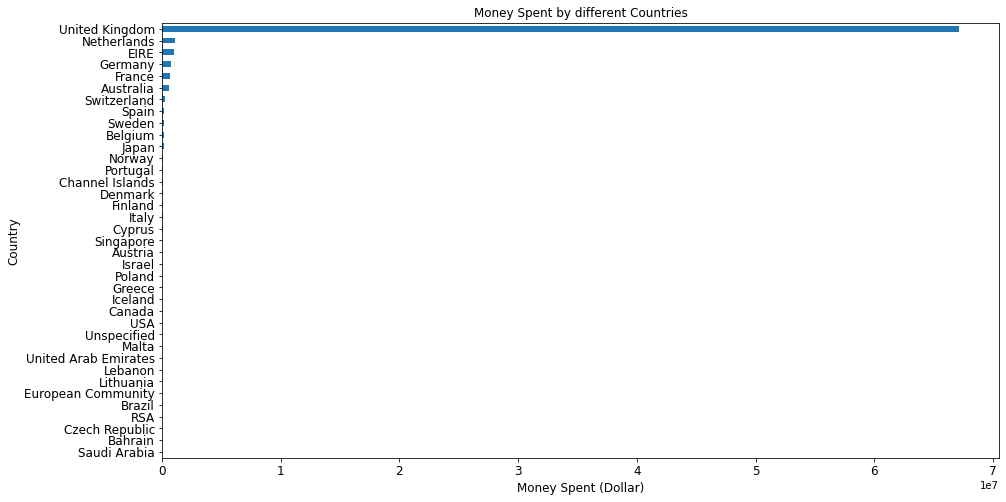

In [42]:
# money spent by each country

group_country_amount_spent = df_new.groupby('Country')['AmountSpent'].sum().sort_values()
# del group_country_orders['United Kingdom']

# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

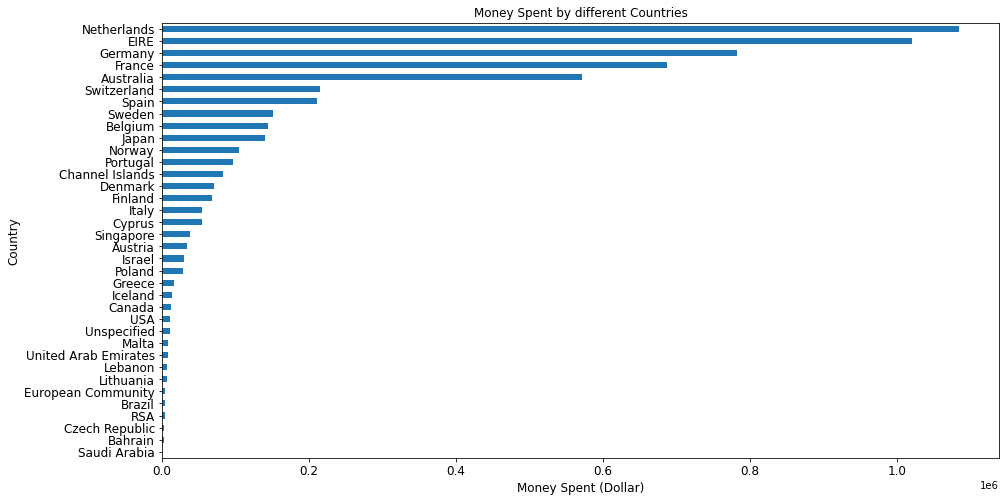

In [43]:
group_country_amount_spent = df_new.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

In [44]:
# df_new.to_csv("transactional_dataset_filtered.csv",index=False)